# Pandas

• Biblioteca escrita sobre o numpy

• Oferece diversos recursos para visualização e limpeza de
dados, com funcionalidades similares aquelas que temos no
Excel

Com o Anaconda já instalado, o processo de instalação do
Pandas é muito simples:

- conda install pandas

OU

-  pip install pandas

In [ ]:
# instalar pandas usando o pip.
!pip install pandas

## Tipo Series

• Pandas possui essencialmente dois objetos, um deles é o Series

• Parece muito com o tipo de dados dicionário de Python

In [ ]:
import numpy as np
import pandas as pd

rotulo = ['a', 'b', 'c']
valores = [3, 17, 30]

pd.Series(valores, rotulo)

ou com numpy

In [ ]:
np_valores = np.array(valores)
pd.Series(np_valores, rotulo)

operações básicas

In [ ]:
top5Paises1990 = pd.Series([89.5, 66.6, 42.4, 34.6 , 26.9], ["EUA", "JP", "AL", "UK", "FR"])
top5Paises1990

In [ ]:
top5Paises2000 = pd.Series([197.4, 128.9, 86.5, 73.9, 70.4], ["EUA", "JP", "AL", "CG", "UK" ])
top5Paises2000

In [ ]:
top5Paises2010 = pd.Series([406, 158.5, 145.5, 126.9, 122], ["CH", "AL", "EUA", "CG", "JP" ])
top5Paises2010

In [ ]:
top5Paises2010["CH"]

In [ ]:
top5Paises2010 + 20

## DataFrame

O DataFrame corresponde a um conjunto de Series

Podemos vê-lo como uma planilha Excel!

In [ ]:
paises = ["EUA", "JP", "AL", "UK", "FR", "CG", "CH"]
anos = ["1990", "2000", "2010"]

dados = [[89.5, 66.6, 42.4, 34.6 , 26.9, 15, 0],
         [197.4, 128.9, 85.5, 70.4, 58.7,73.9, 41.7],
         [145.5, 122, 158.5, 59.8, 99.7, 126.9, 406 ]]

In [ ]:
df = pd.DataFrame(dados, anos, paises) # dados, índices e colunas

In [ ]:
df

Acesso aos dados é similar a notação usada nos dicionários

In [ ]:
df['CH']

In [ ]:
df[['CH', 'EUA']]

In [ ]:
df['CH']['2000']

`df.loc`: Para selecionar linhas ou células do DF usando os rótulos

In [ ]:
df.loc['2000']

In [ ]:
df.loc[['2000','2010'], ['UK', 'FR']]

In [ ]:
df.loc[(df['EUA'] > 100)]

In [ ]:
df.loc[(df['EUA'] > 100), ['EUA']]

Inserção de novos valores também é similar ao que temos em
Dicionários

In [ ]:
df['BR'] = [1, 5.9, 8]

In [ ]:
df

`df.drop` pode ser utilizado para remover linhas (0) ou colunas (1)

In [ ]:
df

In [ ]:
df.drop(columns=['UK'], axis = 1) # sempre retorna um dataframe com a(s) colunas removidas

In [ ]:
df

In [ ]:
#para remover no objeto corrente, use inplace = True
df.drop(columns=['UK'], axis = 1, inplace = True)

In [ ]:
df

Seleção condicional de valores no DF
- Similar ao que temos com numpy array

In [ ]:
df

In [ ]:
# Média de cada coluna
media_por_pais = df.mean()

In [ ]:
media_por_pais

In [ ]:
media_geral = media_por_pais.mean()

In [ ]:
media_geral

In [ ]:
indices_maiores_media_geral = df > media_geral

In [ ]:
# células que apresentam (true) valores maiores que a media geral
indices_maiores_media_geral

In [ ]:
df[indices_maiores_media_geral]

uma outra abordagem seria

In [ ]:
df

In [ ]:
# obtendo apenas a coluna do 'JP'
df['JP']

In [ ]:
# Exibindo quais linhas da coluna JP foram maiores (true) ou igual/menores que a media geral
df['JP'] > media_geral

In [ ]:
#Filtrando as células da coluna 'JP' que foram maiores que a media geral
df[df['JP'] > media_geral][['JP']]

## Operadores de Seleção

Operadores de seleção
úteis
-  & (e)
-  | (ou)

In [ ]:
# dataFrame original
df

In [ ]:
# valor da média geral
media_geral

In [ ]:
# desvio padrão das colunas
df.std()

In [ ]:
# Calculando o desvio padrão de todos os valores
desvio_padrao_geral = df.std().std()
desvio_padrao_geral

In [ ]:
# usando uma expressão a seleção
df[(df > media_geral)]

In [ ]:
# usando o operador & para uma seleção com condição mais complexa
df[(df > media_geral) & df[(df < media_geral + desvio_padrao_geral)]]

Recriando o índice (index)

In [ ]:
df

In [ ]:
# Podemos querer reiniciar os índices para seguir novamente uma sequência númerica
df.reset_index(inplace = True)
df

In [ ]:
df

In [ ]:
df.set_index('index') # o índice pode ser mais de uma coluna

In [ ]:
#df.set_index('index').rename_axis(index=None, axis=1)

# Importando dados com o Pandas

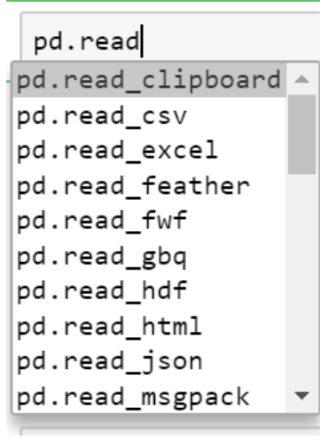

## Lendo um CSV

[Fonte do CSV](https://databrowser.uis.unesco.org/view#indicatorPaths=UIS-SDG9Monitoring%3A0%3ARESDEN.INHAB.TFTE%2CUIS-ScienceOPRI%3A0%3AFRESP.THC&geoMode=countries&geoUnits=&browsePath=SCIENCE_TECHNOLOGY_INNOVATION%2FUIS-ScienceOPRI&timeMode=range&view=table&chartMode=multiple&tableIndicatorId=RESDEN.INHAB.TFTE&chartIndicatorId=RESDEN.INHAB.TFTE&chartHighlightSeries=&chartHighlightEnabled=true)

In [ ]:
df_csv = pd.read_csv('unesco_rd.csv')

In [ ]:
df_csv

In [ ]:
df_csv.head()

In [ ]:
df_csv.tail()

In [ ]:
df_csv.info()

In [ ]:
df_csv.isnull().sum()

In [ ]:
del df_csv['qualifier']
df_csv

In [ ]:
del df_csv['magnitude']
df_csv

In [ ]:
df_csv.to_csv('unesco_rd_modificado.csv')

## Lendo dados de um Excel

In [ ]:
df_excel = pd.read_excel('unesco_rd.xls')

In [ ]:
df_excel

## Importando dados da Internet

- pd.read_html


[Fonte dos dados](https://www.fdic.gov/bank-failures/failed-bank-list)

In [ ]:
df_html = pd.read_html('https://www.fdic.gov/bank-failures/failed-bank-list')

In [ ]:
len(df_html)

In [ ]:
df_html

In [ ]:
df_html[0]